In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("/content/data.csv")

labels = data.iloc[:, 0]
matrix = data.iloc[:, 1:].astype(float)

weights = np.array([1,1,1,1,2])
impacts = ['+','+','-','+','+']

norm = np.sqrt((matrix**2).sum())
normalized = matrix / norm

weighted = normalized * weights

ideal_best = []
ideal_worst = []

for i in range(len(impacts)):
    if impacts[i] == '+':
        ideal_best.append(weighted.iloc[:, i].max())
        ideal_worst.append(weighted.iloc[:, i].min())
    else:
        ideal_best.append(weighted.iloc[:, i].min())
        ideal_worst.append(weighted.iloc[:, i].max())

ideal_best = np.array(ideal_best)
ideal_worst = np.array(ideal_worst)

dist_best = np.sqrt(((weighted - ideal_best)**2).sum(axis=1))
dist_worst = np.sqrt(((weighted - ideal_worst)**2).sum(axis=1))

score = dist_worst / (dist_best + dist_worst)

rank = score.rank(ascending=False)

result = data.copy()
result["Topsis Score"] = score
result["Rank"] = rank.astype(int)

result


,Fund Name,P1,P2,P3,P4,P5,Topsis Score,Rank
0,M1,0.84,0.71,6.7,42.1,12.59,0.376947,6
1,M2,0.91,0.83,7.0,31.7,10.11,0.306839,8
2,M3,0.79,0.62,4.8,46.7,13.23,0.484067,3
3,M4,0.78,0.61,6.4,42.4,12.55,0.336020,7
4,M5,0.94,0.88,3.6,62.2,16.91,0.977223,1
5,M6,0.88,0.77,6.5,51.5,14.91,0.590263,2
6,M7,0.66,0.44,5.3,48.9,13.83,0.439521,5
7,M8,0.93,0.86,3.4,37.0,10.55,0.456554,4


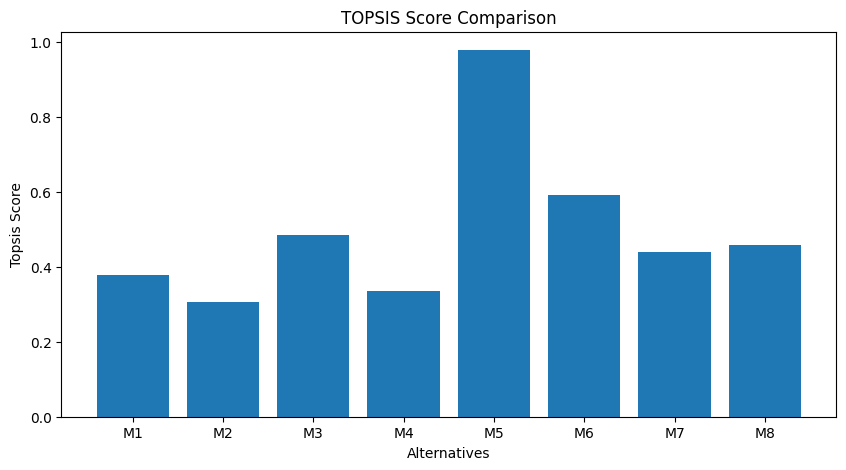

In [3]:
plt.figure(figsize=(10,5))
plt.bar(labels, score)
plt.xlabel("Alternatives")
plt.ylabel("Topsis Score")
plt.title("TOPSIS Score Comparison")
plt.show()
